<a href="https://colab.research.google.com/github/aminayusif/PurchaseIQ/blob/main/PurchaseIQ_CustomerSegmentation_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

This notebook performs customer segmentation using K-Means clustering on e-commerce consumer behavior data. It includes steps for data loading, exploration, preprocessing, clustering, cluster analysis, and anomaly detection using Isolation Forest. The goal is to identify distinct customer segments and unusual purchasing patterns to inform targeted marketing strategies.

Key Sections:

Data Loading and Exploration

Data Preprocessing

Customer Segmentation (K-Means Clustering)

Cluster Analysis and Interpretation

Anomaly Detection (Isolation Forest)

Marketing Recommendations based on Segments and Anomalies

### Data Loading and Exploration

#### Import common libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load dataset

In [2]:
df = pd.read_csv('/content/ECommerce_consumer behaviour.csv')
# Drop rows with any remaining null values after initial inspection
df.dropna(inplace=True)

In [3]:
# Display the first few rows and info
display(df.head())
display(df.info())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
22,1201011,147243,14,0,16.0,3.0,94.0,1.0,0.0,7.0,beverages,tea
23,1201011,147243,14,0,16.0,3.0,83.0,2.0,0.0,4.0,produce,fresh vegetables
24,1201011,147243,14,0,16.0,3.0,83.0,3.0,1.0,4.0,produce,fresh vegetables
25,1201011,147243,14,0,16.0,3.0,24.0,4.0,1.0,4.0,produce,fresh fruits
26,1201011,147243,14,0,16.0,3.0,120.0,5.0,1.0,16.0,dairy eggs,yogurt


<class 'pandas.core.frame.DataFrame'>
Index: 16294 entries, 22 to 17432
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                16294 non-null  int64  
 1   user_id                 16294 non-null  int64  
 2   order_number            16294 non-null  int64  
 3   order_dow               16294 non-null  int64  
 4   order_hour_of_day       16294 non-null  float64
 5   days_since_prior_order  16294 non-null  float64
 6   product_id              16294 non-null  float64
 7   add_to_cart_order       16294 non-null  float64
 8   reordered               16294 non-null  float64
 9   department_id           16294 non-null  float64
 10  department              16294 non-null  object 
 11  product_name            16294 non-null  object 
dtypes: float64(6), int64(4), object(2)
memory usage: 1.6+ MB


None

### Data Preprocessing

Let's check for null values in the dataset

In [4]:
df.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


Displaying the unique values in the '**days_since_prior_order**' column to inspect its contents

In [5]:
df['days_since_prior_order'].unique()

array([ 3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12., 11.,
        2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17., 22.,
       26., 24., 16., 23., 27.])

We have filled the null values in the **days_since_prior_order** column with 0, as these likely represent a user's first order where there is no prior order to calculate the days since.

In [6]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

We now have no null values in our dataset

In [7]:
df.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


We will also clean the 'department' column by removing leading/trailing spaces

In [8]:

df['department'] = df['department'].str.strip()

We will now convert **days_since_prior_order** from float to integer data type

In [9]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16294 entries, 22 to 17432
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                16294 non-null  int64  
 1   user_id                 16294 non-null  int64  
 2   order_number            16294 non-null  int64  
 3   order_dow               16294 non-null  int64  
 4   order_hour_of_day       16294 non-null  float64
 5   days_since_prior_order  16294 non-null  int64  
 6   product_id              16294 non-null  float64
 7   add_to_cart_order       16294 non-null  float64
 8   reordered               16294 non-null  float64
 9   department_id           16294 non-null  float64
 10  department              16294 non-null  object 
 11  product_name            16294 non-null  object 
dtypes: float64(5), int64(5), object(2)
memory usage: 1.6+ MB


### Customer Behavior Analysis

We examine unique values and their counts for categorical columns to understand the distribution and variety of data within those columns

In the context of customer segmentation, understanding the distribution of categories like '**department**' and '**order_dow**' can give us insights into customer preferences and behavior patterns related to the types of products they buy and the days they place orders.

In [11]:
# Examine unique values and their counts for categorical columns
for col in ['order_dow', 'order_hour_of_day', 'department', 'product_name']:
    if col in df.columns:
        display(f"Unique values and counts for column: {col}")
        display(df[col].value_counts())

'Unique values and counts for column: order_dow'

,count
order_dow,
0,3427
1,2897
6,2354
4,1994
2,1911
5,1867
3,1844


'Unique values and counts for column: order_hour_of_day'

,count
order_hour_of_day,
15.0,1445
12.0,1432
11.0,1392
10.0,1369
14.0,1366
16.0,1269
13.0,1133
17.0,1101
9.0,1062


'Unique values and counts for column: department'

,count
department,
produce,4684
dairy eggs,2795
snacks,1394
beverages,1381
frozen,1157
pantry,921
bakery,582
canned goods,566
deli,520


'Unique values and counts for column: product_name'

,count
product_name,
fresh fruits,1889
fresh vegetables,1680
packaged vegetables fruits,811
yogurt,747
packaged cheese,488
...,...
first aid,3
eye ear care,2
kosher foods,2


The value counts for '**department**','**order_hour_of_day**','**product_name**' and '**order_dow**' show the frequency of each category.

'Produce' is the most frequent department, and day '0' (likely Sunday) is the most frequent order day of the week.

Based on the output for 'order_hour_of_day', it appears that the peak hours for placing orders are around 10 AM to 4 PM (hours 10 through 16), with the counts being significantly higher during this period compared to early morning or late night hours. This suggests that customers are most active during typical working or daytime hours.

#### Visualizing Order Counts by Hour of the Day

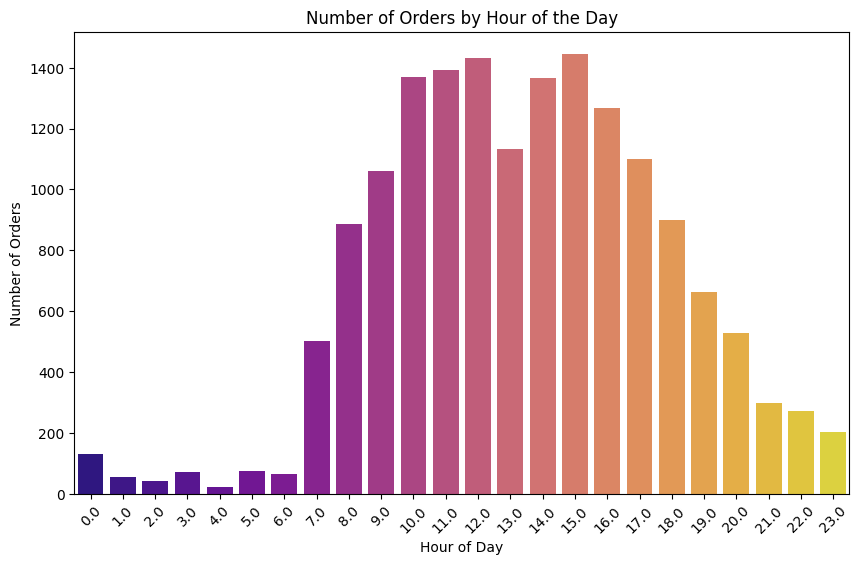

In [12]:
# Count the number of orders for each hour of the day
orders_by_hour = df['order_hour_of_day'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_hour.index, y=orders_by_hour.values, palette='plasma')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#### Visualizing Number of Orders by Day of the Week

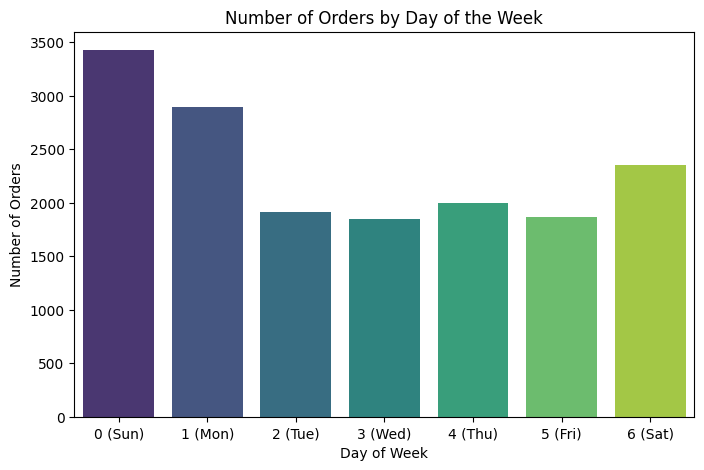

In [13]:
# Count the number of orders for each day of the week
orders_by_day = df['order_dow'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='viridis')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(ticks=orders_by_day.index, labels=['0 (Sun)', '1 (Mon)', '2 (Tue)', '3 (Wed)', '4 (Thu)', '5 (Fri)', '6 (Sat)'])
plt.show()

#### Visualizing Top 20 Most Ordered Products

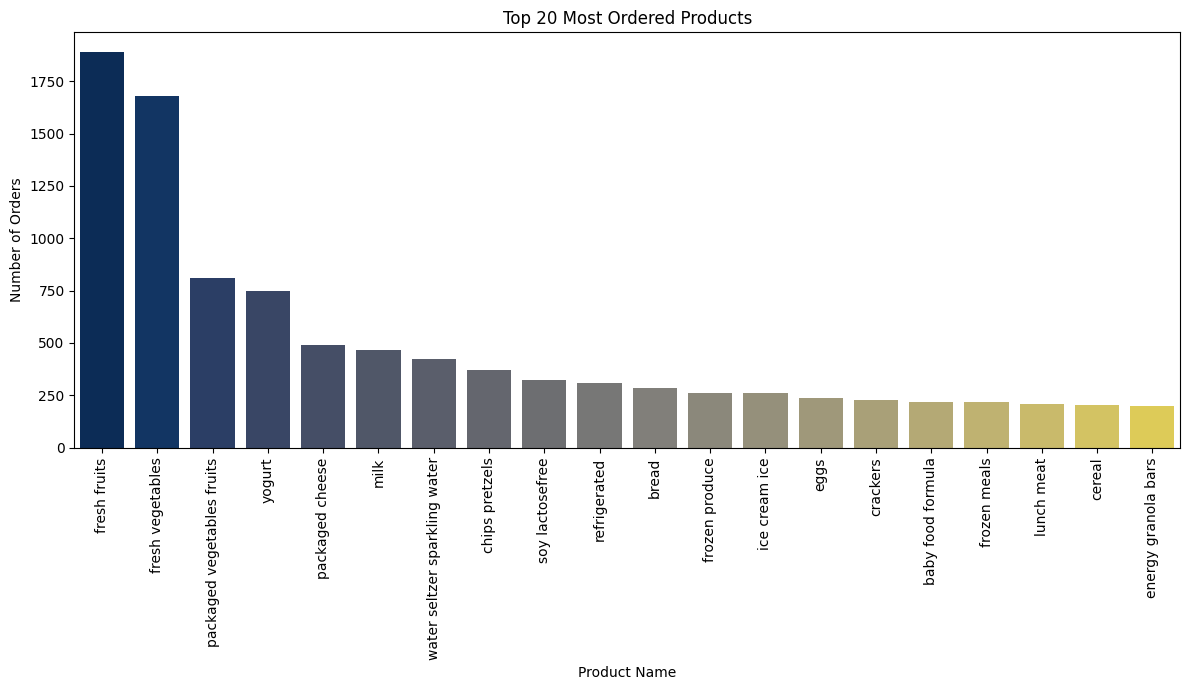

In [14]:
# Count the number of orders for each product and get the top 20
top_products = df['product_name'].value_counts().head(20)

# Create a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_products.index, y=top_products.values, palette='cividis')
plt.title('Top 20 Most Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Visualizing Order Counts by Department

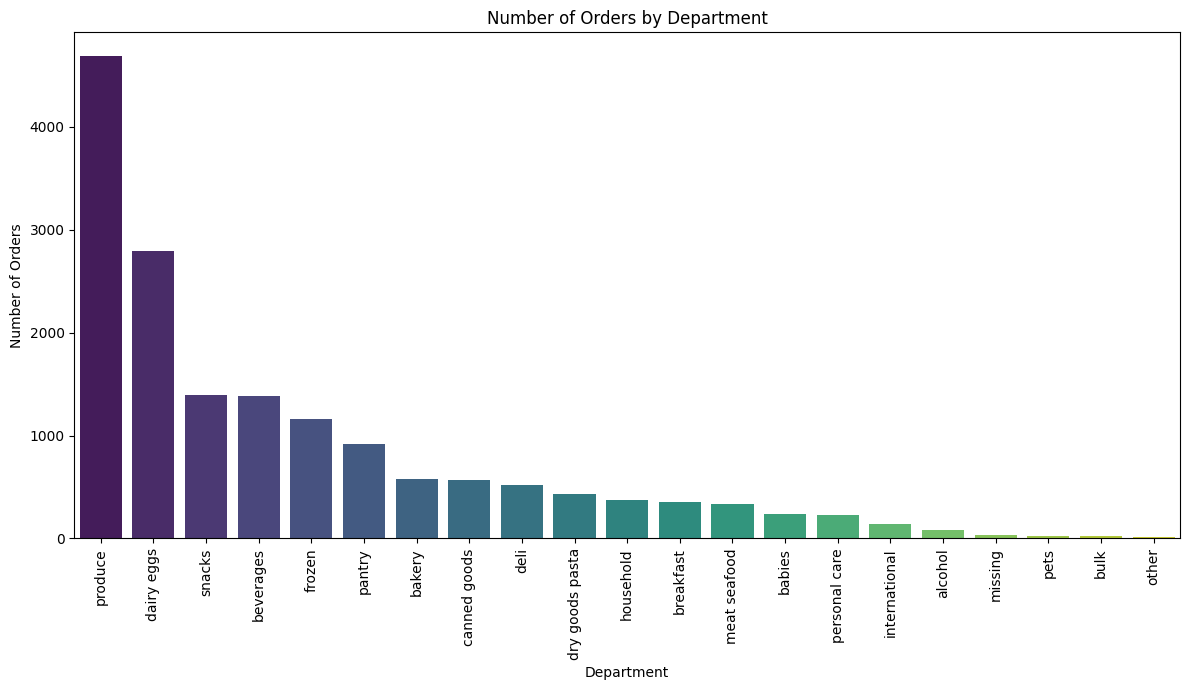

In [15]:
# Count the number of orders for each department
orders_by_department = df['department'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=orders_by_department.index, y=orders_by_department.values, palette='viridis')
plt.title('Number of Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# 3. Encode categorical features
categorical_features = ['department', 'order_dow']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# 4. Select numerical columns that are suitable for scaling
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# Exclude identifier columns
numerical_features = [col for col in numerical_features if col not in ['order_id', 'user_id', 'product_id', 'department_id']]

# 5. Scale the selected numerical features using StandardScaler
scaler = StandardScaler()

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', one_hot_encoder, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (like IDs) as they are
)

# Create a pipeline to apply the preprocessing steps
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
df_processed = preprocessing_pipeline.fit_transform(df)

# Convert the processed data back to a DataFrame for easier handling (optional, but often useful)
# Get the new column names after one-hot encoding
new_column_names = numerical_features + list(preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
# Add back the columns that were passed through
passthrough_cols = [col for col in df.columns if col not in numerical_features + categorical_features]
new_column_names += passthrough_cols

df_processed = pd.DataFrame(df_processed, columns=new_column_names, index=df.index)

display(df_processed.head())
display(df_processed.shape)
display(df_processed.isnull().sum().sum()) # Check for any remaining missing values

,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department_alcohol,department_babies,department_bakery,department_beverages,...,order_dow_2,order_dow_3,order_dow_4,order_dow_5,order_dow_6,order_id,user_id,product_id,department_id,product_name
22,-0.279984,-1.263801,0.606505,-0.943255,-1.003772,-1.313644,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1201011,147243,94.0,7.0,tea
23,-0.279984,-1.263801,0.606505,-0.943255,-0.867681,-1.313644,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1201011,147243,83.0,4.0,fresh vegetables
24,-0.279984,-1.263801,0.606505,-0.943255,-0.731591,0.761241,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1201011,147243,83.0,4.0,fresh vegetables
25,-0.279984,-1.263801,0.606505,-0.943255,-0.595501,0.761241,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1201011,147243,24.0,4.0,fresh fruits
26,-0.279984,-1.263801,0.606505,-0.943255,-0.459411,0.761241,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1201011,147243,120.0,16.0,yogurt


(16294, 39)

np.int64(0)

### Principal Component Analysis (PCA)

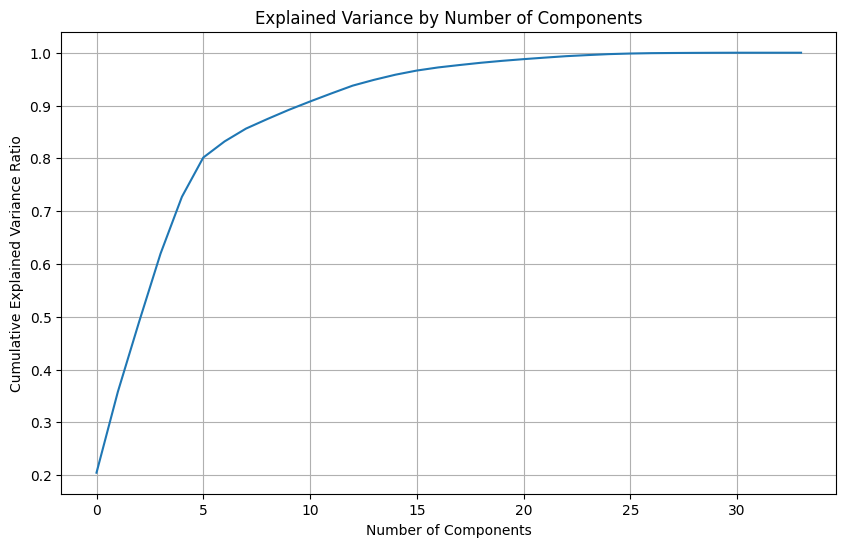

Number of components explaining at least 95% variance: 15


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,user_id
22,-0.181930,-0.963673,-0.666951,0.567374,-2.056465,-0.207664,-0.244106,-0.561868,-0.133675,-0.485221,-0.063320,0.019002,0.027183,-0.676438,-0.441492,147243
23,-0.188634,-0.979891,-0.549880,0.601585,-1.988004,-0.247247,0.732771,-0.640846,0.269117,-0.042204,-0.072801,-0.010637,-0.026606,0.007427,-0.041936,147243
24,0.801789,-1.275274,-0.951109,0.615975,-0.353196,-0.879434,0.675894,-0.617189,0.192178,-0.097635,-0.083799,0.003408,-0.020861,0.023296,0.007120,147243
25,0.781235,-1.275928,-0.832651,0.655726,-0.309961,-0.903601,0.675556,-0.615734,0.191729,-0.093216,-0.083390,0.004343,-0.021118,0.021332,0.006019,147243
26,0.757884,-1.258122,-0.729366,0.703580,-0.277249,-0.918658,-0.640145,-0.590223,0.522436,0.301425,-0.132647,-0.021382,-0.060450,0.014930,-0.018922,147243


In [18]:
from sklearn.decomposition import PCA

# Separate features from identifiers
features_df = df_processed.drop(['order_id', 'user_id', 'product_id', 'department_id', 'product_name'], axis=1)

# Initialize PCA and fit to the processed data
pca = PCA()
pca.fit(features_df)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

# Choose the number of components based on the elbow point or a desired explained variance
# For example, let's choose components that explain 95% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components explaining at least 95% variance: {n_components}")

# Re-run PCA with the selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(features_df)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)], index=df_processed.index)

# You might want to add back user_id or other identifiers for later analysis
pca_df['user_id'] = df_processed['user_id']

display(pca_df.head())

The output **Number of components explaining at least 95% variance: 15** tells us that the first 15 principal components retain at least 95% of the total information (variance) present in the original 34 features (features_df has 34 columns after dropping the identifiers). This means we can effectively reduce the dimensionality of the dataset from 34 to 15 features while losing only a small amount of information (less than 5%). These 15 principal components capture the most significant patterns and variations in the customer behavior data.